# Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.

## Table of Contents
<ol>
<li><a href="#variables">Variables</a></li>
<li><a href="#hypo">Hypothesis</a></li>
<li><a href="#desc">Descriptive Statistics</a></li>
<li><a href="#viz">Visualizations</a></li>
<li><a href="#stats">Statistical Analysis & Reporting</a></li>
<li><a href="#opt">Optional Task</a></li>
</ol>


<a id='variables'></a>
## (1) Variables


### What is the independent variable? What is the dependent variable?
- Independent variable is reaction time in word-color congruence test i.e. time taken in tests where the word and color of the printed word matched.
- Dependent variable is reaction time in word-color incongruence test i.e. time taken in tests where the word and color of the printed word did not match.


<a id='hypo'></a>
## (2) Hypothesis

### What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
- We run a **paired t-test** for hypothesis testing here. 
- We state that reaction times for word-color match and mismatch word color are the same.

### Hypothesis
- Null Hypothesis ->  $H_{0}$ : $t_{match}$ -  $t_{mismatch}$ = 0 # 
- Alternate Hypothesis -> $H_{1}$ : $t_{match}$ -  $t_{mismatch}$ != 0 
- $t_{match}$ is reaction time for Congruent set while $t_{mismatch}$ is reaction time for Incongruent set

### Justification for paired t-test :
- Here, the sample size is less than 30
- The experiment is similar to Before and After experiment as the first set trained subjects on the study while the second set showed the Stroop Effect Incongruent set of words.
- Thus, the second set is Dependent set and the reaction times in this set cannot be considered completely independent.
- Hence, we use the paired t-test

<a id='desc'></a>
## (3) Descriptive Statistics

#### Report some descriptive statistics regarding this dataset. 
Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [24]:
## Import the packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# read dataset
df = pd.read_csv('stroopdata.csv')

# inspect dataset
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [26]:
# inspect dataset values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [27]:
# Calculate descriptive statistics for dataframe values. This includes count, avaerage/ mean and interquartile ranges
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Here, we need to calculate at least one measure of central tendency and at least one measure of variability.
Hence, we compute  the following values:
- Median for measure of central tendency
- Mean and interquartile ranges are already computed in above step.
- We also compute variance and standard deviation as measures of variability.

In [28]:
# determine median
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [29]:
# determine variance
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

In [30]:
# determine standard deviation
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

<a id='viz'></a>
## (4) Visualizations:
Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [31]:
# Build the visualizations here
# Firs we plot histograms for values in Congruent and Incongruent sets

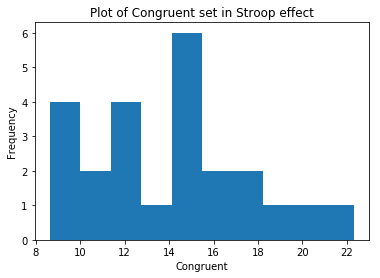

In [32]:
# Build the visualizations for Congruent set
plt.hist(df['Congruent'])
plt.xlabel('Congruent')
plt.ylabel('Frequency')
plt.title('Plot of Congruent set in Stroop effect');

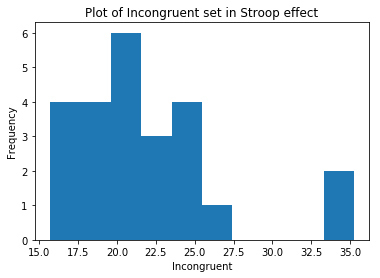

In [33]:
# Build the visualizations for Incongruent set
plt.hist(df['Incongruent'])
plt.xlabel('Incongruent')
plt.ylabel('Frequency')
plt.title('Plot of Incongruent set in Stroop effect');

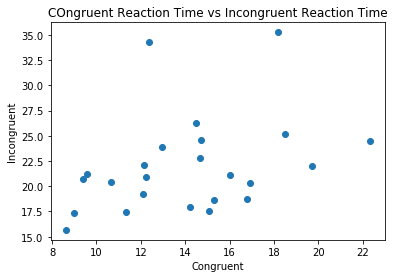

In [34]:
# plotting reacton times for congruent and incongruent sets
plt.scatter(x = df['Congruent'], y = df['Incongruent']);
plt.xlabel('Congruent')
plt.ylabel('Incongruent')
plt.title('COngruent Reaction Time vs Incongruent Reaction Time');

In [35]:
# We calculate correlation between the reaction times for congruent and incongruent experiments to see relation if any
df.corr()

,Congruent,Incongruent
Congruent,1.00000,0.35182
Incongruent,0.35182,1.00000


We make the following observations from the plots above:
- For word-color match, most likey reaction time is 14-15 seconds.
- For word-color mismatch, most likey reaction time is 20-21 seconds.
- Both distributions are right skewed. The incongruent set however, shows no values in the 27 and 33.5 range
- We view a roughly positive, proportional correlation with few outliers. But, as seen in the calculated values (above), the correlation is not very strong.

<a id='stats'></a>
## (5) Statistical Analysis & Reporting:
Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

### Perform the statistical test here

In [36]:
# Evaluate Sample Size from shape function applied to dataset
N = df.shape[0]
print("Sample Size N is {}".format(N))

Sample Size N is 24


In [37]:
# Get distribution of Congruent experiment values
a = df['Congruent']
# distribution of Incongruent experiment values
b = df['Incongruent']

In [38]:
# We have to calculate the Standard Deviation. Hence, first we compute the variance
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1

var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

print(var_a, var_b)

12.669029070652174 23.011757036231884


In [39]:
## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)
print("Standard Deviation is {}".format(s))

Standard Deviation is 4.223788945182042


In [40]:
## Calculate the t-statistics using formula
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
print("t-value is {}".format(t))

# Here, negative sign indicates direction

t-value is -6.5322505539032285


In [41]:
# We need to compare degree of freedom with the critical t-value
# So, we calculate Degrees of freedom using the formula
degF = 2*N - 2
print("Degree of Freedom is {}".format(degF))

Degree of Freedom is 46


In [42]:
# Calculate p-value
p = 1 - stats.t.cdf(t,degF)

print("p-value is {}".format(p))

p-value is 0.9999999770252552


In [45]:
print("t-value is {}".format(abs(t)))
print("p-value is {}".format(2*p))
# Here, we multiply the p value by 2 because it's a two tail t-test
# After comparing the t statistic with the critical t value, we get p-values as 1.9999. 

t-value is 6.5322505539032285
p-value is 1.9999999540505105


In [46]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t-value is {}".format(abs(t2)))
print("p-value is {}".format(2*p2))

t-value is 6.5322505539032285
p-value is 9.189897924590371e-08


#### Observations & Hypothesis Conclusions
- As calculated t-value is greater than p-value, we reject the null hypothesis.
- That is, we reject the null hypothesis that the reaction times are not different.
- We accept the Alternate Hypothesis that reaction times are different and that Stroop effect is valid.
- Thus, proved that the two distributions are different and statistically significant.
- Note: Here, we disregard the negative sign of the t-values as it is only indicative of direction.
- Confidence interval used is 95%

<a id='opt'></a>
## (6) Optional Task

- **What do you think is responsible for the effects observed? ** Reading is quicker than analysing the color. When the two are matched, the process is simple. When the two are micmatched as in the second experiment, it takes focus and conscious effort to dissociate the two, process the color while suppressing the reading of te word and then naming only the color out loud.
- **Can you think of an alternative or similar task that would result in a similar effect?**  Shape-word effect. Words are printed in black in the shape particpants are asked to identify. Then, print words in black in shapes that are not matching the actual shape-word. Another task could be where paricipants are shown word-color mismatches in a language they are comfortable reading in. Then, showing the same color-word mismatch but in a language they cannot read in. This would demonstrate that when posed with only color (even if mismatched in the foreign language), subjects are able to process better as only color identification is enabled.
- **Some research about the problem will be helpful for thinking about these two questions!** Used Wikipedia link to study this further at https://en.wikipedia.org/wiki/Stroop_effect

#### Resources:
- http://www.statisticshowto.com/probability-and-statistics/t-test/
- http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/
- https://www.statsdirect.com/help/parametric_methods/paired_t.htm
- https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
- https://en.wikipedia.org/wiki/Stroop_effect

#### Notes: 
- t-value and p-values are also calculated with 95% confidence interval in Excel using formula for paired t-test. 
- Results and conclusions match those calculated here.
